In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [7]:
data = pd.read_csv('/content/Mobile_data.csv')

In [8]:
data.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   clock_speed    2000 non-null   float64
 2   fc             2000 non-null   int64  
 3   int_memory     2000 non-null   int64  
 4   m_dep          2000 non-null   float64
 5   mobile_wt      2000 non-null   int64  
 6   n_cores        2000 non-null   int64  
 7   pc             2000 non-null   int64  
 8   px_height      2000 non-null   int64  
 9   px_width       2000 non-null   int64  
 10  ram            2000 non-null   int64  
 11  sc_h           2000 non-null   int64  
 12  sc_w           2000 non-null   int64  
 13  talk_time      2000 non-null   int64  
 14  price_range    2000 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 234.5 KB


In [10]:
data.shape

(2000, 15)

In [11]:
data.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,1.500000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,1.118314
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,0.750000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.500000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,2.250000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,3.000000


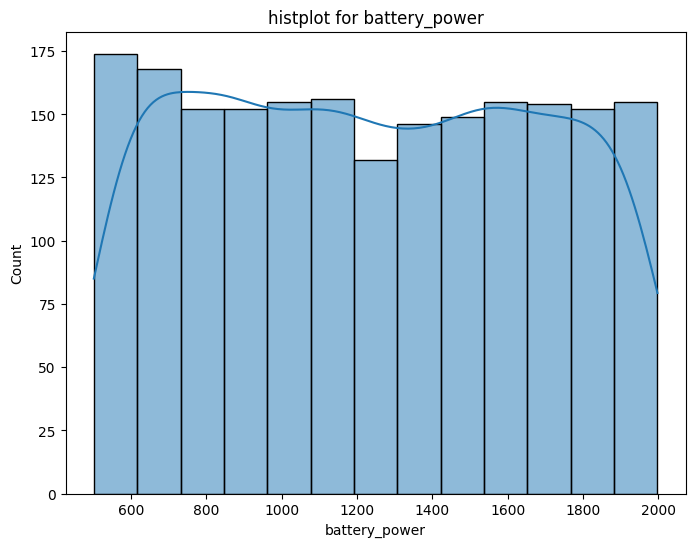

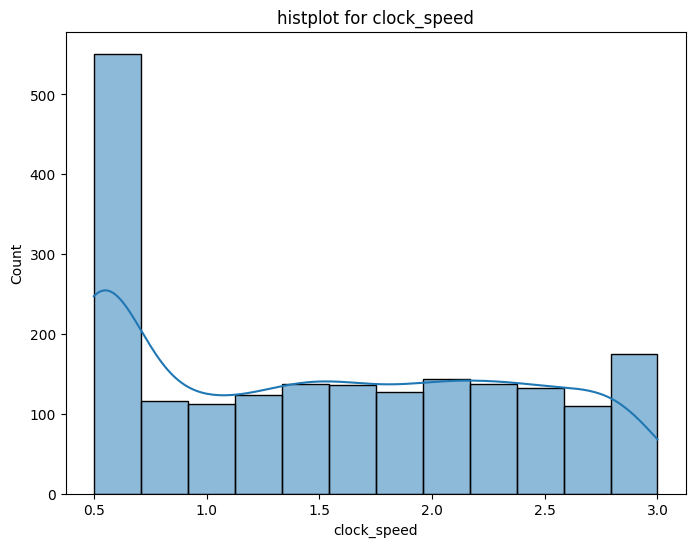

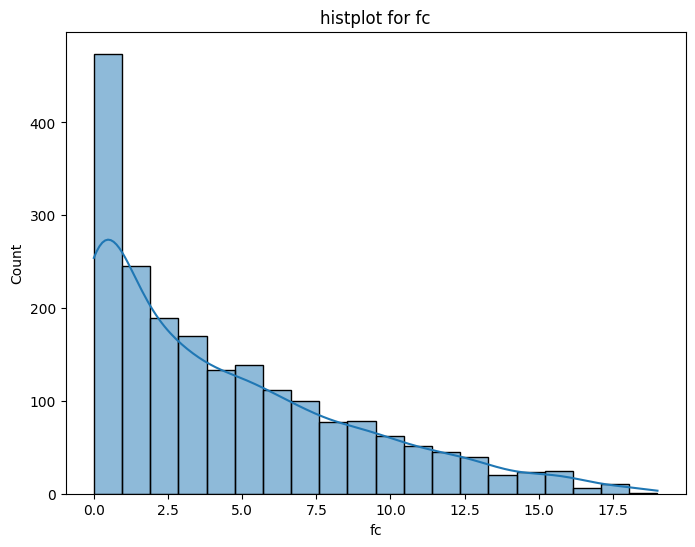

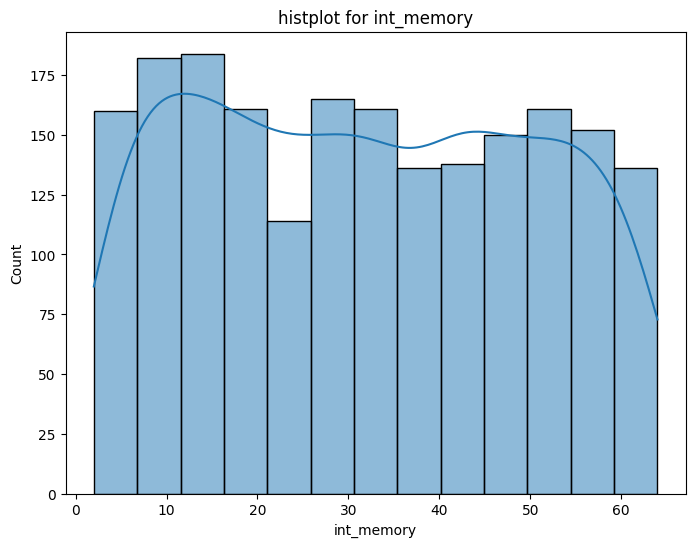

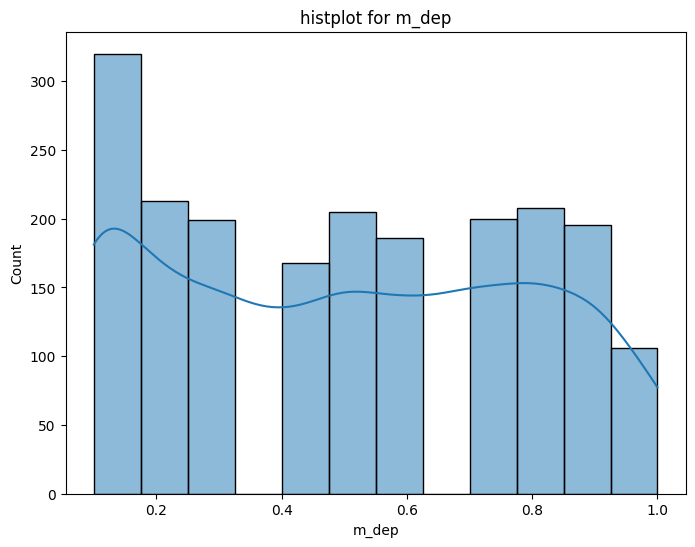

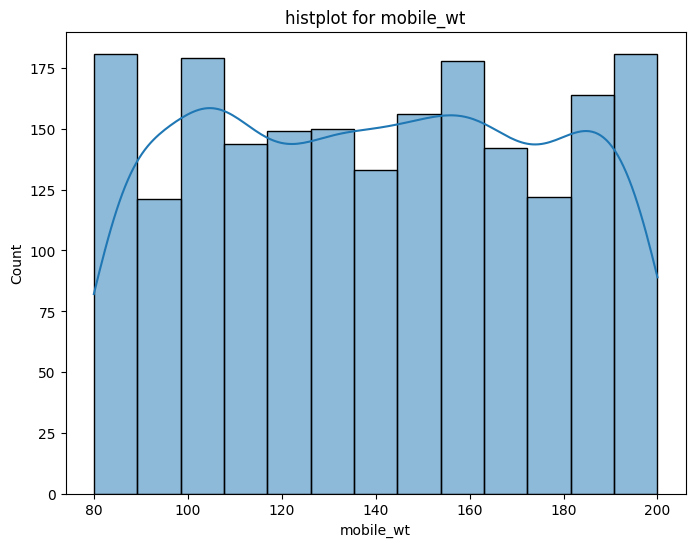

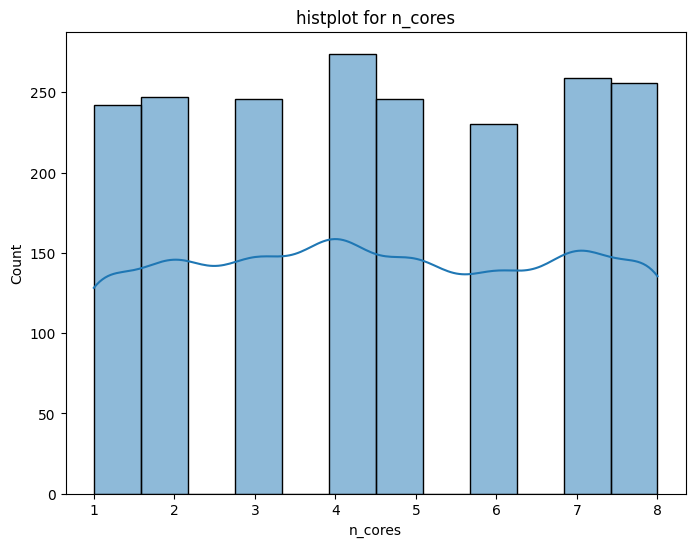

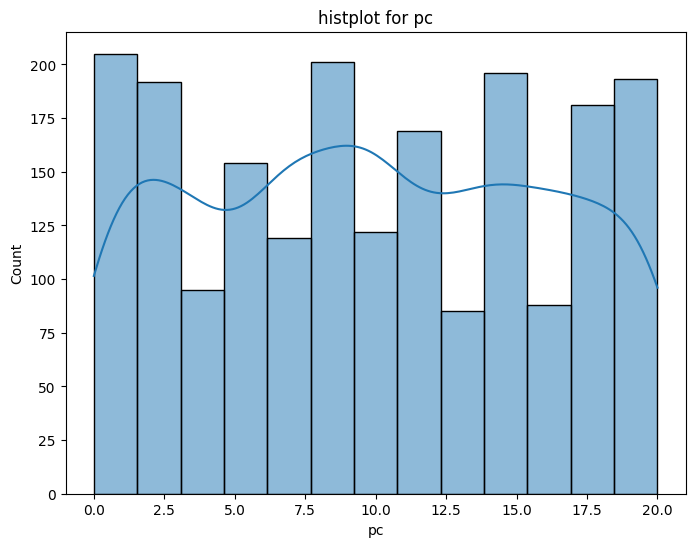

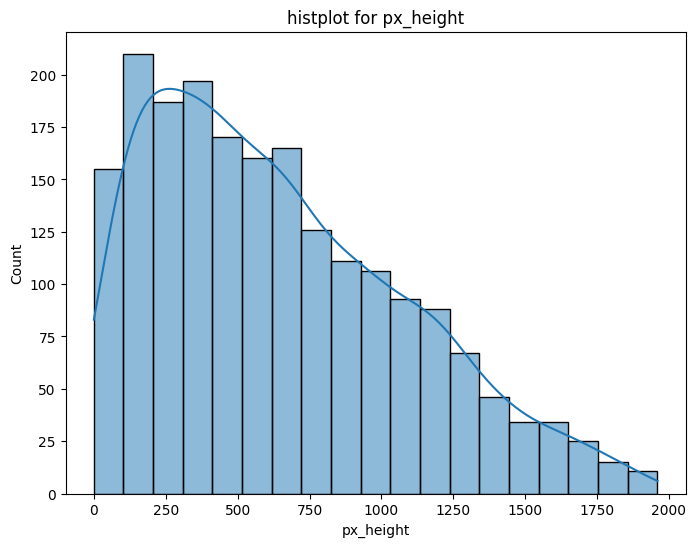

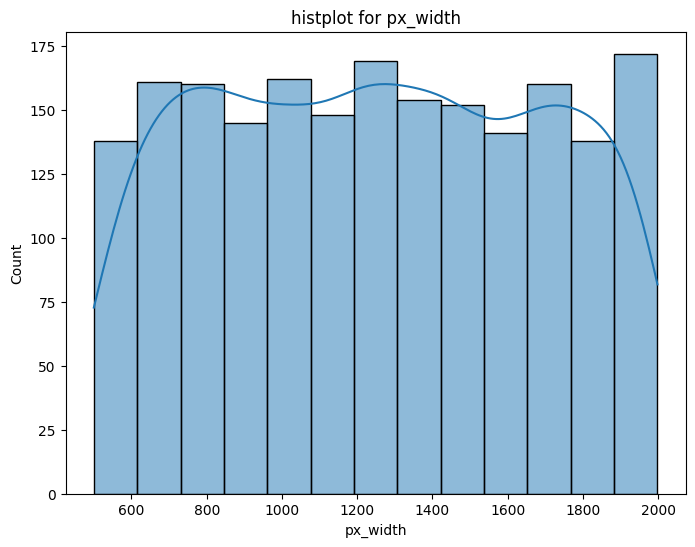

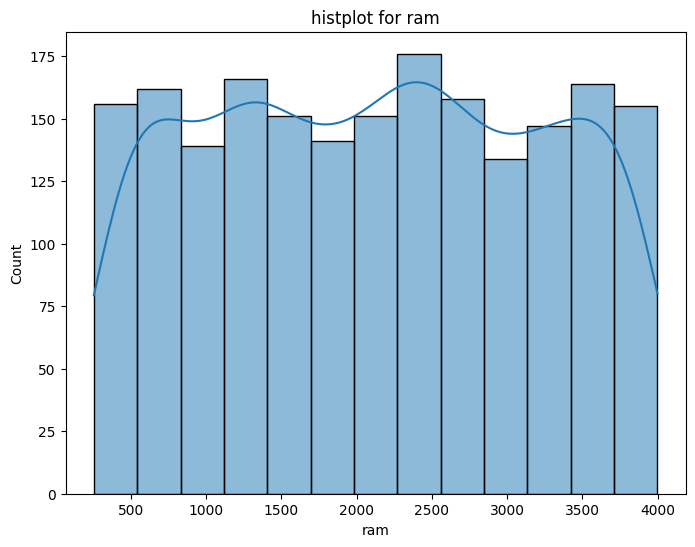

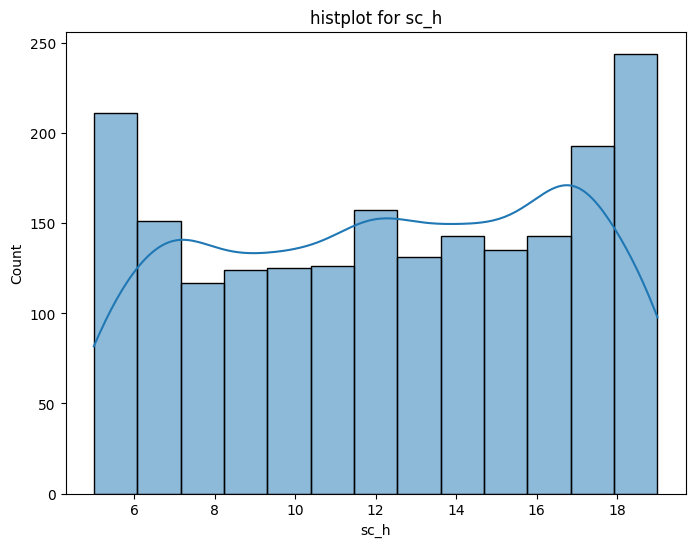

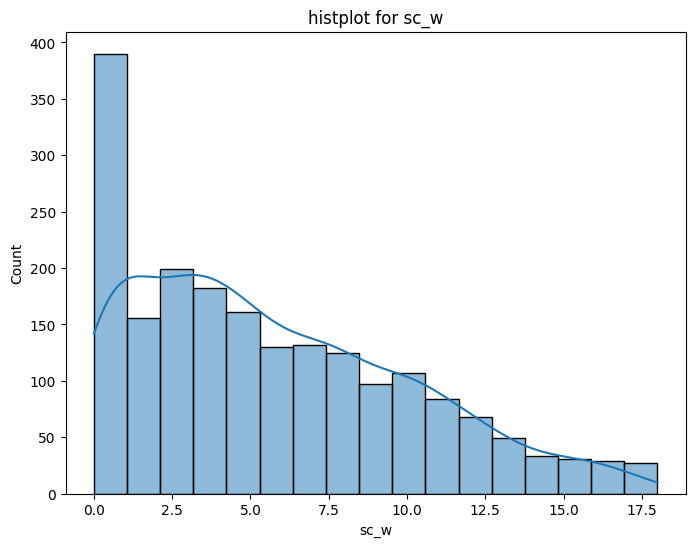

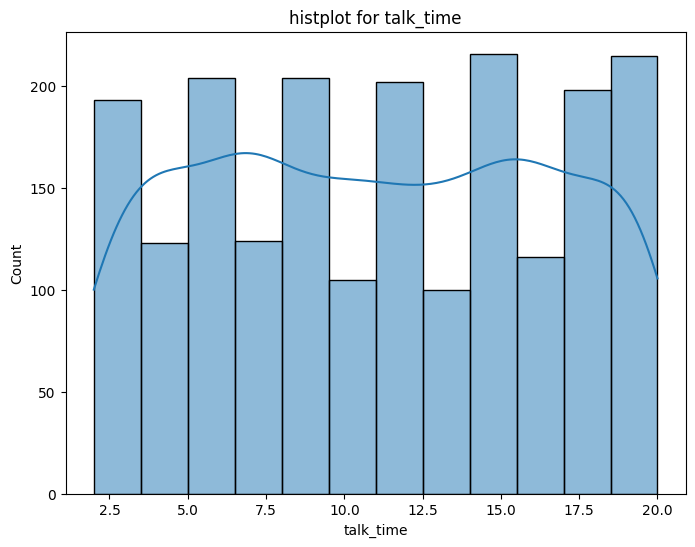

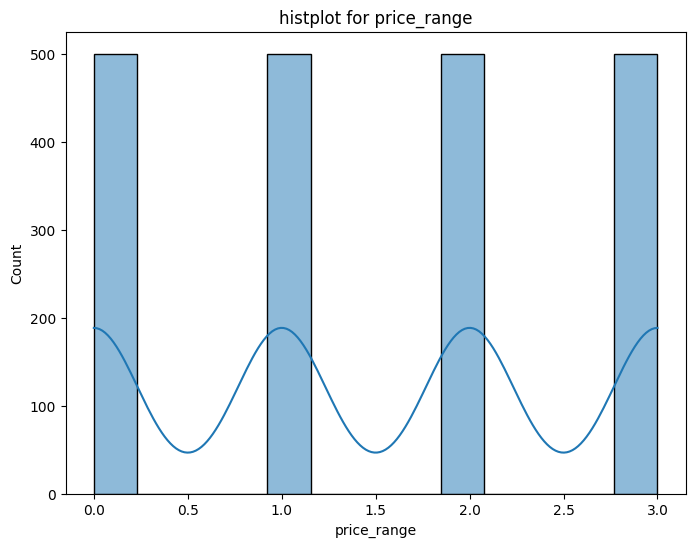

In [12]:
num_features = data.select_dtypes(include=[np.number])
for i in num_features:
  plt.figure(figsize=(8,6))
  sns.histplot(num_features[i],kde=True,palette='viridis')
  plt.title(f"histplot for {i}")
  plt.show()


In [13]:
data.skew()

battery_power    0.031898
clock_speed      0.178084
fc               1.019811
int_memory       0.057889
m_dep            0.089082
mobile_wt        0.006558
n_cores          0.003628
pc               0.017306
px_height        0.666271
px_width         0.014787
ram              0.006628
sc_h            -0.098884
sc_w             0.633787
talk_time        0.009512
price_range      0.000000
dtype: float64

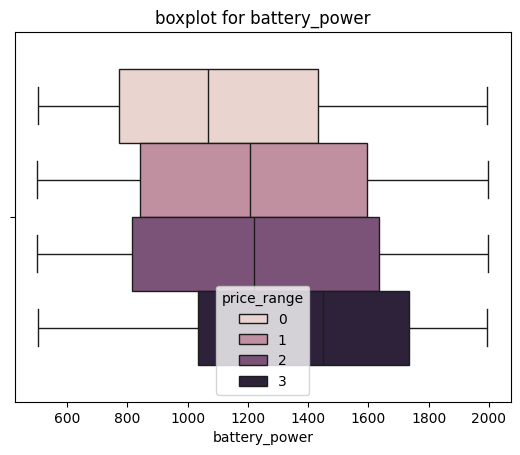

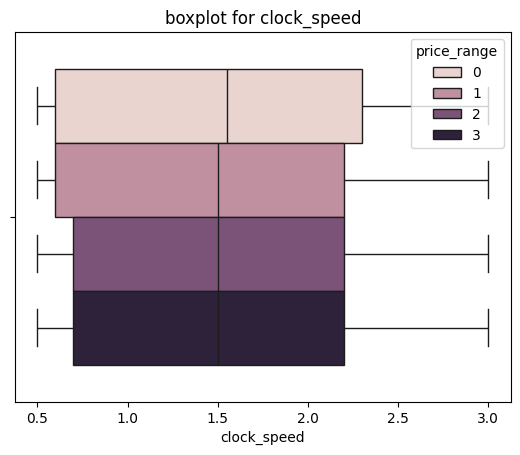

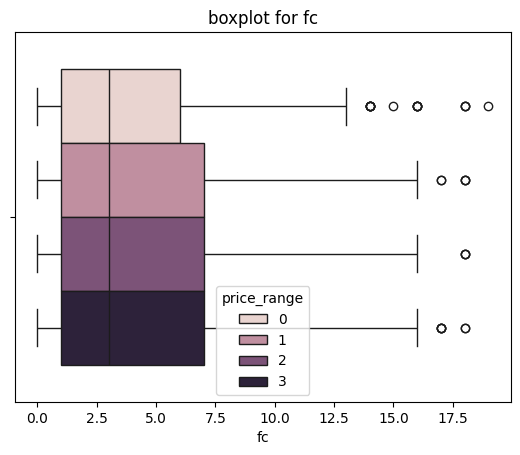

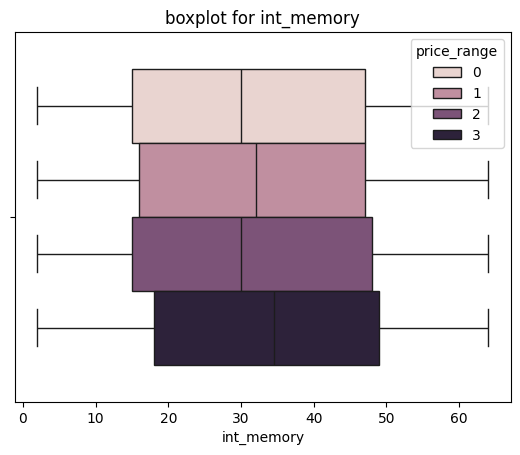

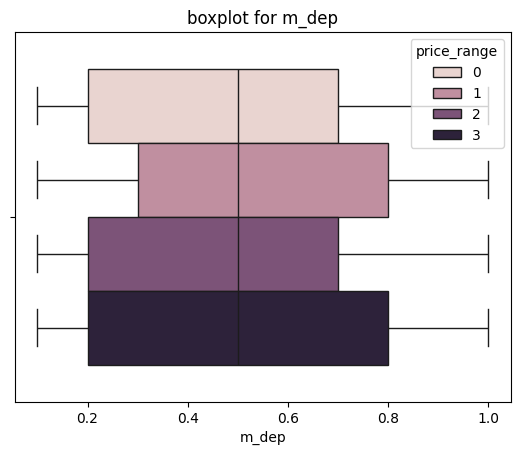

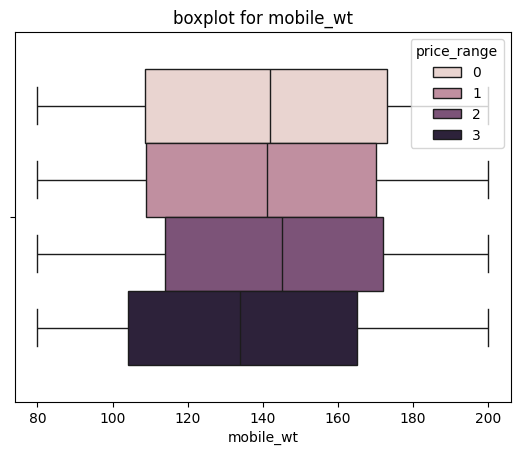

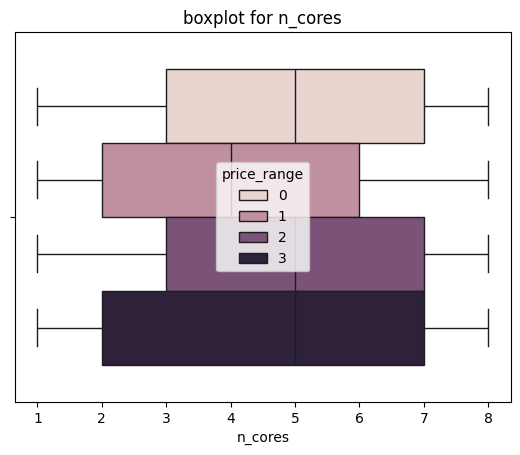

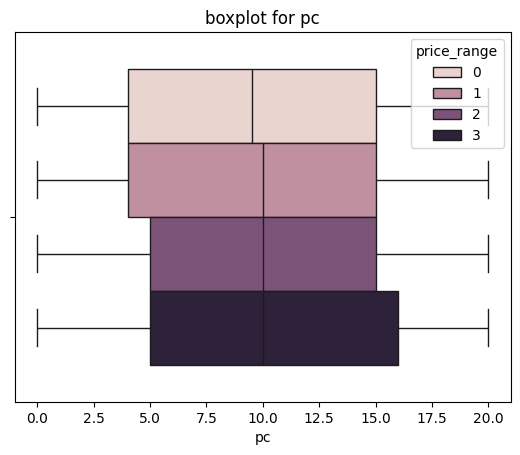

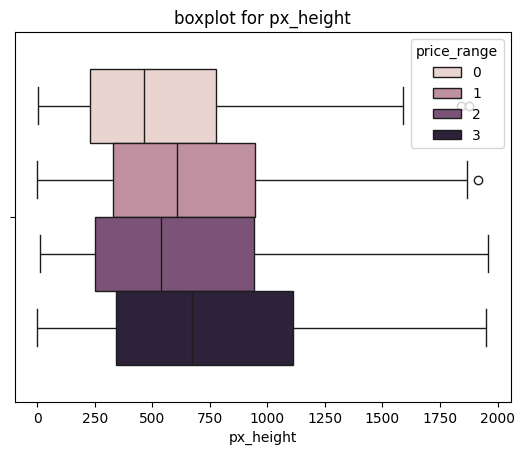

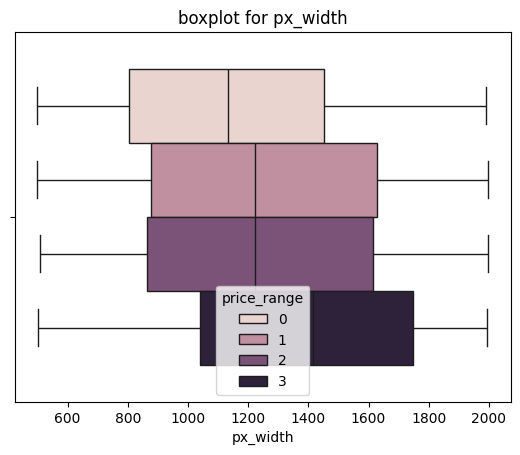

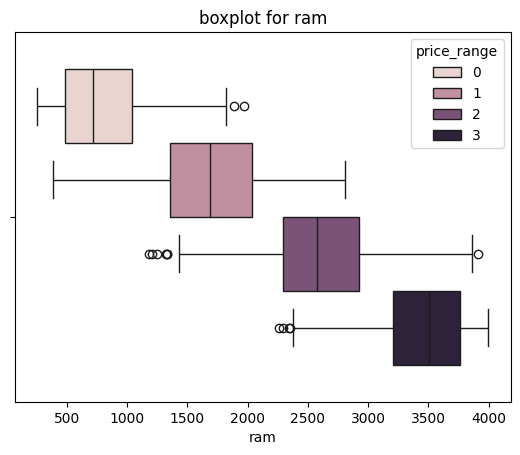

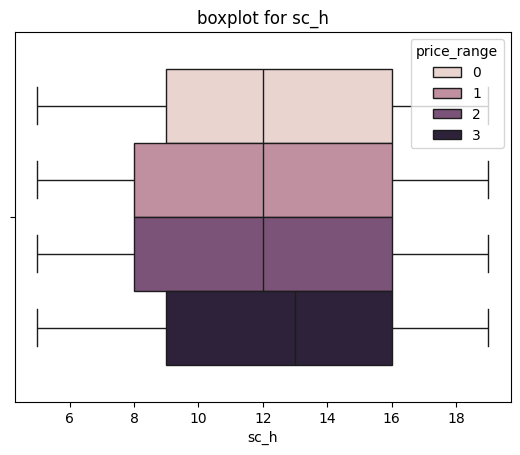

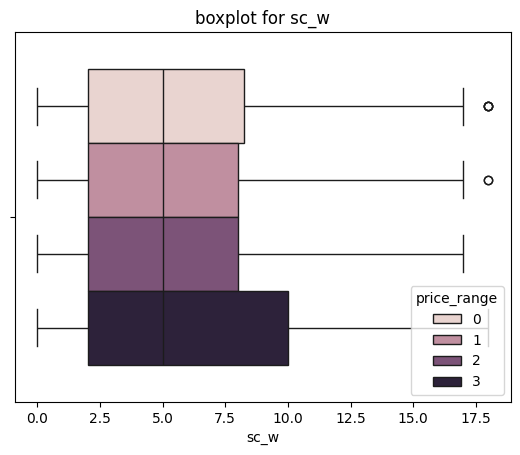

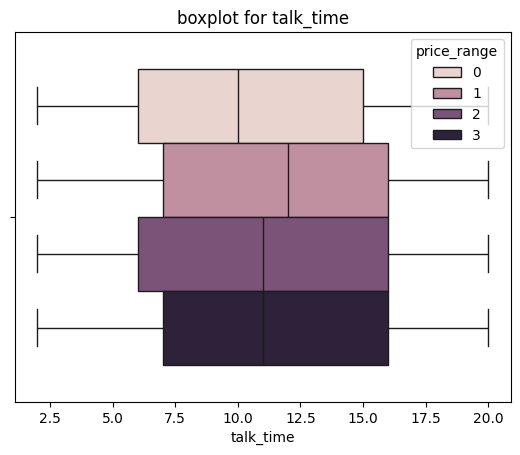

In [14]:
for i in data.columns:
  if i!='price_range':
    sns.boxplot(x = data[i], hue = data['price_range'])
    plt.title(f"boxplot for {i}")
    plt.show()

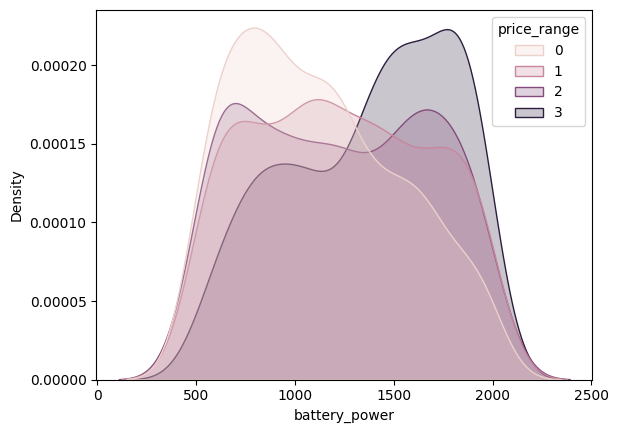

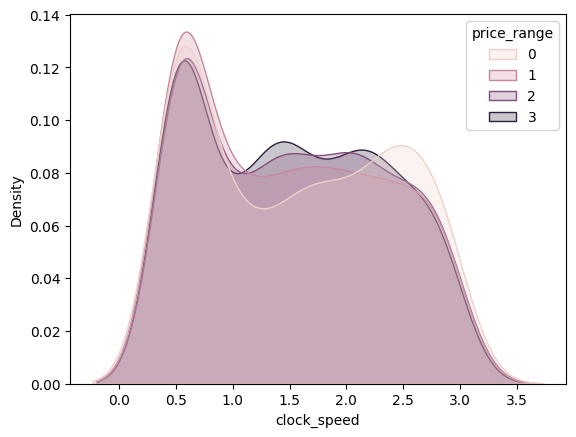

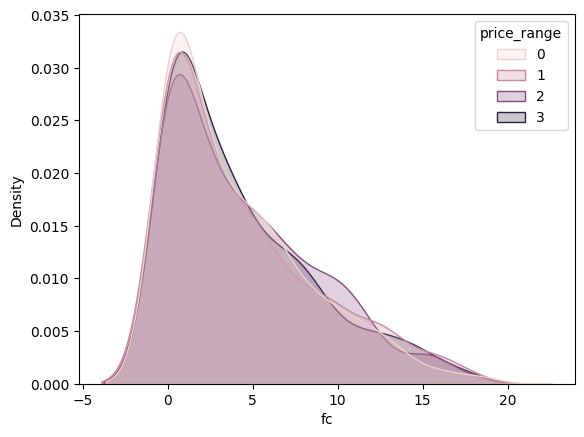

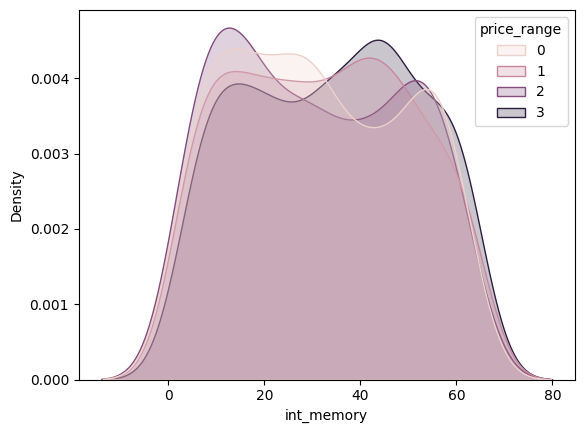

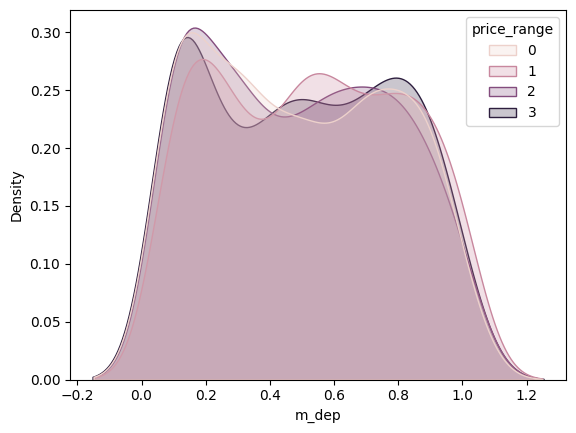

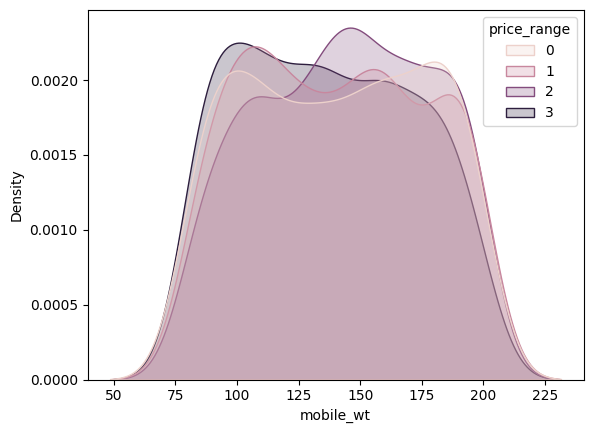

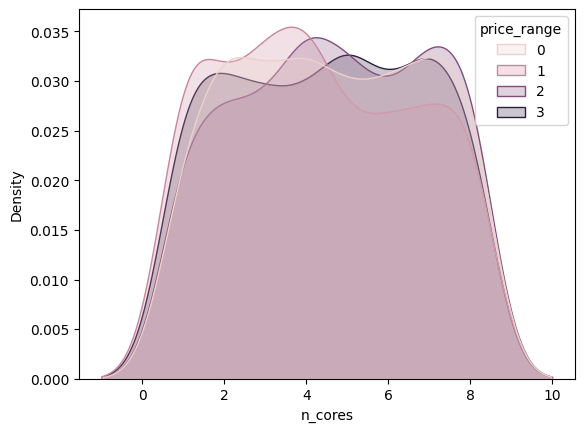

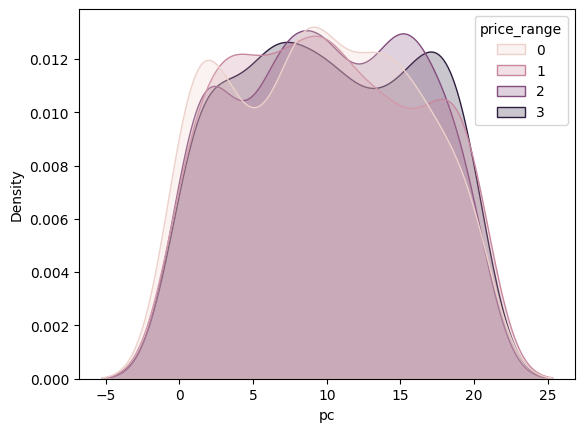

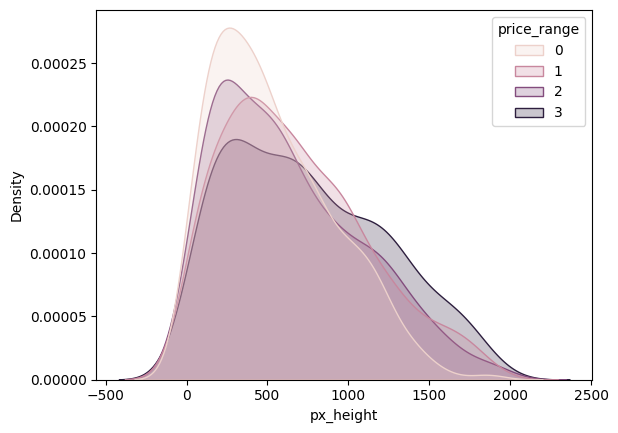

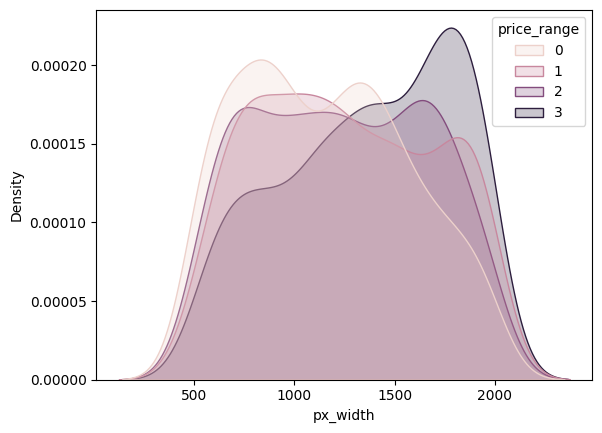

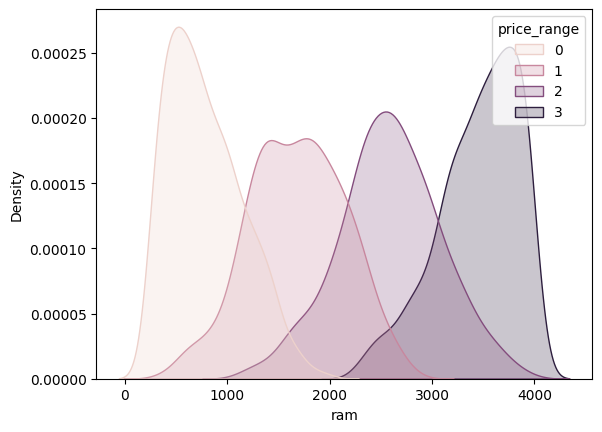

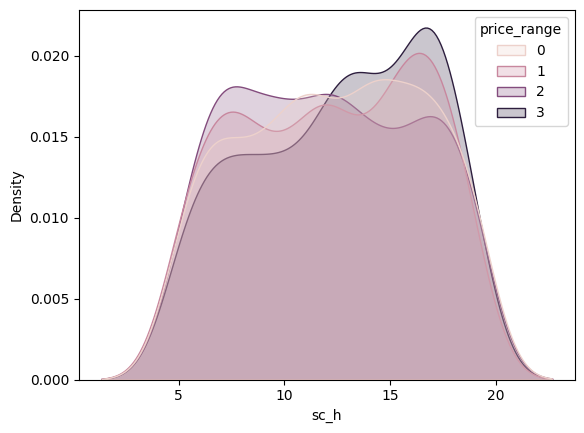

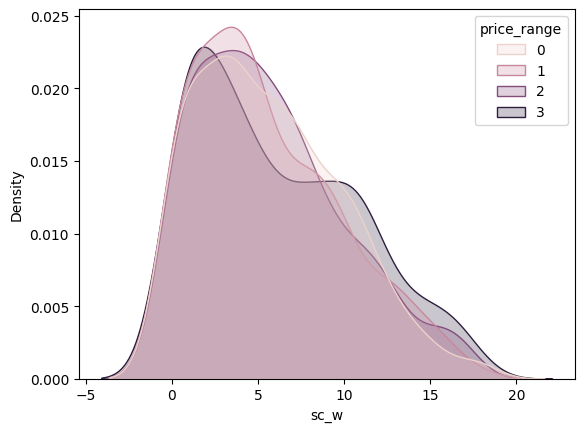

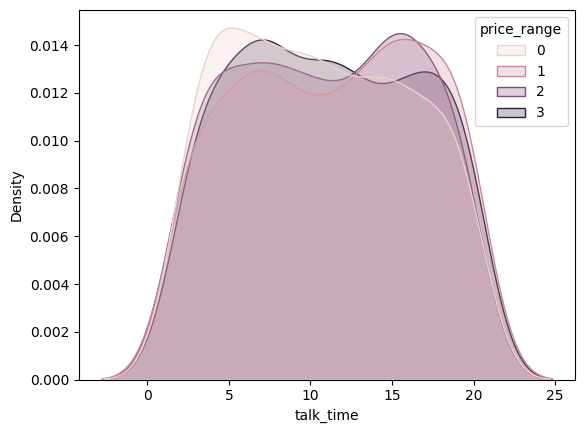

In [15]:
for i in data.columns:
  if i !='price_range':
    sns.kdeplot(x=data[i],hue=data['price_range'],fill=True,label=i)
    plt.show()

<Axes: >

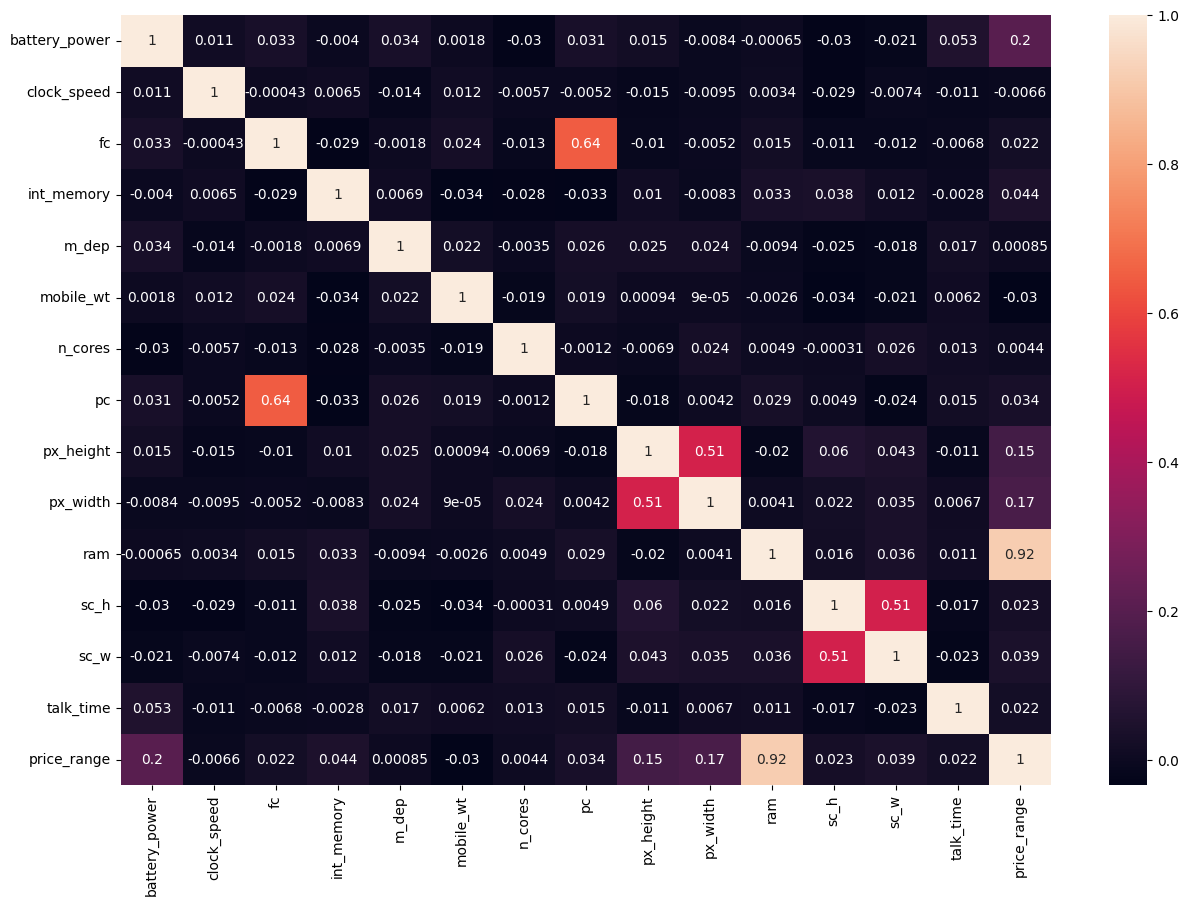

In [16]:
corr = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)

In [17]:
x = data.drop('price_range',axis=1)
y = data['price_range']

In [18]:
print(x.shape)
print(y.head())

(2000, 14)
0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64


In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=123)

In [20]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 14)
(400, 14)
(1600,)
(400,)


In [21]:
logreg = LogisticRegression(solver='lbfgs',max_iter=100)
logreg.fit(x_train,y_train)

LogisticRegression()

In [22]:
y_train_pred = logreg.predict(x_train)
y_test_pred = logreg.predict(x_test)

In [23]:
def model_eval(actual,pred):
  conf_mat = confusion_matrix(actual,pred)
  acc_score = accuracy_score(actual,pred)
  class_report = classification_report(actual,pred)
  print(conf_mat)
  print("accuracy of the model:",round(acc_score,2))
  print(class_report)

In [24]:
model_eval(y_train,y_train_pred)

[[332  76   5   0]
 [ 67 216  89  28]
 [  1  91 174 118]
 [  0   4  93 306]]
accuracy of the model: 0.64
              precision    recall  f1-score   support

           0       0.83      0.80      0.82       413
           1       0.56      0.54      0.55       400
           2       0.48      0.45      0.47       384
           3       0.68      0.76      0.72       403

    accuracy                           0.64      1600
   macro avg       0.64      0.64      0.64      1600
weighted avg       0.64      0.64      0.64      1600



In [25]:
model_eval(y_test,y_test_pred)

[[65 22  0  0]
 [20 61 13  6]
 [ 0 29 44 43]
 [ 0  0 13 84]]
accuracy of the model: 0.64
              precision    recall  f1-score   support

           0       0.76      0.75      0.76        87
           1       0.54      0.61      0.58       100
           2       0.63      0.38      0.47       116
           3       0.63      0.87      0.73        97

    accuracy                           0.64       400
   macro avg       0.64      0.65      0.63       400
weighted avg       0.64      0.64      0.62       400



In [26]:
dtree = DecisionTreeClassifier(max_depth=4)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [27]:
y_train_dtree_pred = dtree.predict(x_train)
y_test_dtree_pred = dtree.predict(x_test)

In [28]:
model_eval(y_train,y_train_dtree_pred)

[[389  24   0   0]
 [ 39 349  12   0]
 [  0 118 214  52]
 [  0   1  28 374]]
accuracy of the model: 0.83
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       413
           1       0.71      0.87      0.78       400
           2       0.84      0.56      0.67       384
           3       0.88      0.93      0.90       403

    accuracy                           0.83      1600
   macro avg       0.83      0.82      0.82      1600
weighted avg       0.84      0.83      0.82      1600



In [29]:
model_eval(y_test,y_test_dtree_pred)

[[80  7  0  0]
 [16 77  7  0]
 [ 0 37 61 18]
 [ 0  0  8 89]]
accuracy of the model: 0.77
              precision    recall  f1-score   support

           0       0.83      0.92      0.87        87
           1       0.64      0.77      0.70       100
           2       0.80      0.53      0.64       116
           3       0.83      0.92      0.87        97

    accuracy                           0.77       400
   macro avg       0.78      0.78      0.77       400
weighted avg       0.77      0.77      0.76       400



In [30]:
feature_score = pd.Series(dtree.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_score

ram              0.857151
battery_power    0.080769
px_height        0.032999
px_width         0.029081
clock_speed      0.000000
fc               0.000000
int_memory       0.000000
m_dep            0.000000
mobile_wt        0.000000
n_cores          0.000000
pc               0.000000
sc_h             0.000000
sc_w             0.000000
talk_time        0.000000
dtype: float64

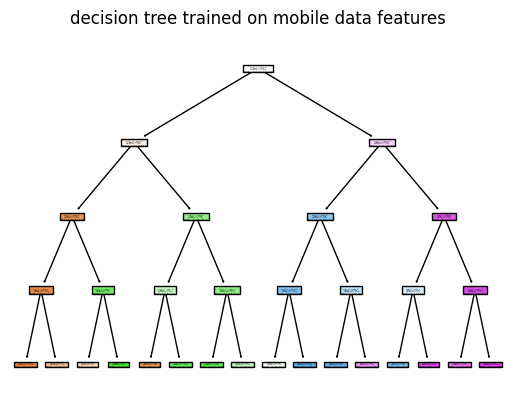

In [31]:
from sklearn.tree import plot_tree

clasif = DecisionTreeClassifier(max_depth=4).fit(x_train,y_train)
plot_tree(clasif,filled=True)
plt.title("decision tree trained on mobile data features")
plt.show()

In [32]:
clf = RandomForestClassifier(criterion='entropy',max_depth=5,min_samples_split=3)
clf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_split=3)

In [33]:
y_train_random_pred = clf.predict(x_train)
y_test_random_pred = clf.predict(x_test)

In [34]:
model_eval(y_train,y_train_random_pred)

[[409   4   0   0]
 [ 25 332  43   0]
 [  0  60 297  27]
 [  0   0   1 402]]
accuracy of the model: 0.9
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       413
           1       0.84      0.83      0.83       400
           2       0.87      0.77      0.82       384
           3       0.94      1.00      0.97       403

    accuracy                           0.90      1600
   macro avg       0.90      0.90      0.90      1600
weighted avg       0.90      0.90      0.90      1600



In [35]:
model_eval(y_test,y_test_random_pred)

[[84  3  0  0]
 [ 9 81 10  0]
 [ 0 25 70 21]
 [ 0  0  4 93]]
accuracy of the model: 0.82
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        87
           1       0.74      0.81      0.78       100
           2       0.83      0.60      0.70       116
           3       0.82      0.96      0.88        97

    accuracy                           0.82       400
   macro avg       0.82      0.83      0.82       400
weighted avg       0.82      0.82      0.81       400



In [36]:
ada = AdaBoostClassifier(n_estimators=150,learning_rate=1,random_state=0)
ada.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=150, random_state=0)

In [37]:
y_train_ada_pred = ada.predict(x_train)
y_test_ada_pred = ada.predict(x_test)

In [38]:
model_eval(y_train,y_train_random_pred)

[[409   4   0   0]
 [ 25 332  43   0]
 [  0  60 297  27]
 [  0   0   1 402]]
accuracy of the model: 0.9
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       413
           1       0.84      0.83      0.83       400
           2       0.87      0.77      0.82       384
           3       0.94      1.00      0.97       403

    accuracy                           0.90      1600
   macro avg       0.90      0.90      0.90      1600
weighted avg       0.90      0.90      0.90      1600



In [39]:
model_eval(y_test,y_test_random_pred)

[[84  3  0  0]
 [ 9 81 10  0]
 [ 0 25 70 21]
 [ 0  0  4 93]]
accuracy of the model: 0.82
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        87
           1       0.74      0.81      0.78       100
           2       0.83      0.60      0.70       116
           3       0.82      0.96      0.88        97

    accuracy                           0.82       400
   macro avg       0.82      0.83      0.82       400
weighted avg       0.82      0.82      0.81       400



In [40]:
gradboost = GradientBoostingClassifier()
gradboost.fit(x_train,y_train)

GradientBoostingClassifier()

In [41]:
y_train_grad_pred = gradboost.predict(x_train)
y_test_grad_pred = gradboost.predict(x_test)

In [42]:
model_eval(y_train,y_train_grad_pred)

[[413   0   0   0]
 [  0 400   0   0]
 [  0   0 383   1]
 [  0   0   0 403]]
accuracy of the model: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       413
           1       1.00      1.00      1.00       400
           2       1.00      1.00      1.00       384
           3       1.00      1.00      1.00       403

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [43]:
model_eval(y_test,y_test_grad_pred)

[[84  3  0  0]
 [ 7 89  4  0]
 [ 0  9 98  9]
 [ 0  0  7 90]]
accuracy of the model: 0.9
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        87
           1       0.88      0.89      0.89       100
           2       0.90      0.84      0.87       116
           3       0.91      0.93      0.92        97

    accuracy                           0.90       400
   macro avg       0.90      0.91      0.90       400
weighted avg       0.90      0.90      0.90       400



In [44]:
from xgboost import XGBClassifier

xg = XGBClassifier()
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [45]:
y_train_xg_pred = xg.predict(x_train)
y_test_xg_pred = xg.predict(x_test)

In [46]:
model_eval(y_train,y_train_xg_pred)

[[413   0   0   0]
 [  0 400   0   0]
 [  0   0 384   0]
 [  0   0   0 403]]
accuracy of the model: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       413
           1       1.00      1.00      1.00       400
           2       1.00      1.00      1.00       384
           3       1.00      1.00      1.00       403

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [47]:
model_eval(y_test,y_test_xg_pred)

[[ 85   2   0   0]
 [  5  91   4   0]
 [  0   8 100   8]
 [  0   0   7  90]]
accuracy of the model: 0.92
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        87
           1       0.90      0.91      0.91       100
           2       0.90      0.86      0.88       116
           3       0.92      0.93      0.92        97

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.91      0.92      0.91       400



In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
neighbors = KNeighborsClassifier(n_neighbors=9)
neighbors.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [78]:
y_train_knn_predict = neighbors.predict(x_train)
y_test_knn_predict = neighbors.predict(x_test)

In [79]:
model_eval(y_train,y_train_knn_predict)

[[404   9   0   0]
 [ 10 379  11   0]
 [  0  17 349  18]
 [  0   0  15 388]]
accuracy of the model: 0.95
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       413
           1       0.94      0.95      0.94       400
           2       0.93      0.91      0.92       384
           3       0.96      0.96      0.96       403

    accuracy                           0.95      1600
   macro avg       0.95      0.95      0.95      1600
weighted avg       0.95      0.95      0.95      1600



In [80]:
model_eval(y_test,y_test_knn_predict)

[[ 84   3   0   0]
 [  4  94   2   0]
 [  0   7 102   7]
 [  0   0   4  93]]
accuracy of the model: 0.93
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        87
           1       0.90      0.94      0.92       100
           2       0.94      0.88      0.91       116
           3       0.93      0.96      0.94        97

    accuracy                           0.93       400
   macro avg       0.93      0.94      0.93       400
weighted avg       0.93      0.93      0.93       400



In [71]:
list_accuracy =[]
for i in range(1,100):

  neighbors = KNeighborsClassifier(n_neighbors=i)
  neighbors.fit(x_train,y_train)
  y_train_knn_predict = neighbors.predict(x_train)
  y_test_knn_predict = neighbors.predict(x_test)
  list_accuracy.append(accuracy_score(y_test,y_test_knn_predict))


print(list_accuracy)

[0.885, 0.905, 0.92, 0.925, 0.9275, 0.9275, 0.9325, 0.93, 0.9325, 0.9325, 0.9225, 0.9225, 0.9275, 0.93, 0.925, 0.9275, 0.93, 0.93, 0.925, 0.9275, 0.9225, 0.9225, 0.925, 0.9175, 0.915, 0.92, 0.92, 0.9225, 0.9275, 0.9225, 0.93, 0.925, 0.9275, 0.92, 0.925, 0.9175, 0.9275, 0.9225, 0.9225, 0.9175, 0.9175, 0.92, 0.9175, 0.9175, 0.9175, 0.9125, 0.9125, 0.9075, 0.915, 0.9075, 0.905, 0.9075, 0.9075, 0.9075, 0.9125, 0.91, 0.9125, 0.905, 0.9075, 0.905, 0.905, 0.905, 0.905, 0.905, 0.91, 0.9025, 0.9, 0.9025, 0.8975, 0.905, 0.905, 0.91, 0.9075, 0.91, 0.9025, 0.91, 0.9075, 0.905, 0.9075, 0.9025, 0.905, 0.9025, 0.8975, 0.9025, 0.9025, 0.905, 0.9075, 0.9075, 0.9025, 0.9025, 0.9, 0.9, 0.8975, 0.905, 0.9025, 0.9025, 0.9025, 0.905, 0.905]


In [74]:
import plotly.express as px
list_accuracy_1 = pd.DataFrame(list_accuracy)


In [76]:
# prompt: line plot using px

fig = px.line(list_accuracy)
fig.show()


<Axes: >

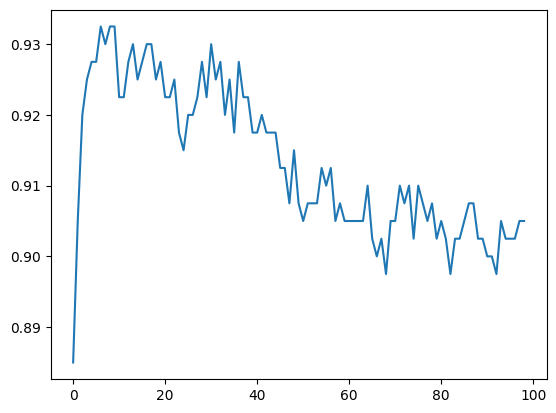

In [70]:
sns.lineplot(list_accuracy)